In [5]:
import pandas as pd

In [6]:
dataenc = pd.read_excel("./data/inventory_data_autoencoder.xlsx")
databaiges = pd.read_csv("./data/inventory_data_with_deterioration_index.csv")

FileNotFoundError: [Errno 2] No such file or directory: '.data/inventory_data_with_deterioration_index.csv'

In [ ]:
dataenc.shape

(292, 45)

In [ ]:
databaiges.shape

(292, 23)

In [ ]:
dataenc2 = dataenc.drop(columns = ['Jan_2022', "Feb_2022", "Mar_2022", "Apr_2022", "May_2022", "Jun_2022", "Jul_2022", "Aug_2022", "Sep_2022", "Oct_2022", "Nov_2022", "Dec_2022", 'Jan_2023', "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023", "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"])

In [ ]:
databaiges2 = databaiges.drop(columns=["data_darrera_entrada", "data_darrera_sortida"])

In [ ]:
merged_data = dataenc2.merge(databaiges2, on="material")

In [ ]:
merged_data.columns

Index(['material', 'unitats_2022_x', 'vendes_2022_x',
       'preu_venda_unitari_2022_x', 'unitats_2023_x', 'vendes_2023_x',
       'preu_venda_unitari_2023_x', 'variacio_preu_venda_unitari_2022_2023_x',
       'proporcio_variacio_preu_venda_unitari_2022_2023_x',
       'data_darrera_entrada', 'dies_ultima_entrada_x', 'data_darrera_sortida',
       'dies_ultima_sortida_x', 'diferencia_entrada_sortida_x',
       'stock_final_2023_x', 'valor_total_stock_2023_x',
       'cost_unitari_stock_2023_x', 'forecast_index', 'cost_valor',
       'proporcio_vendes_stock', 'autoencoder_index', 'unitats_2022_y',
       'vendes_2022_y', 'preu_venda_unitari_2022_y', 'unitats_2023_y',
       'vendes_2023_y', 'preu_venda_unitari_2023_y',
       'variacio_preu_venda_unitari_2022_2023_y',
       'proporcio_variacio_preu_venda_unitari_2022_2023_y',
       'dies_ultima_entrada_y', 'dies_ultima_sortida_y',
       'diferencia_entrada_sortida_y', 'stock_final_2023_y',
       'valor_total_stock_2023_y', 'cost_un

In [ ]:
merged_data["indice_deterioro"] = [ i if i != float("-inf") else -2 for i in merged_data["indice_deterioro"] ]

In [ ]:
min(merged_data["indice_deterioro"])

-299.2451572558914

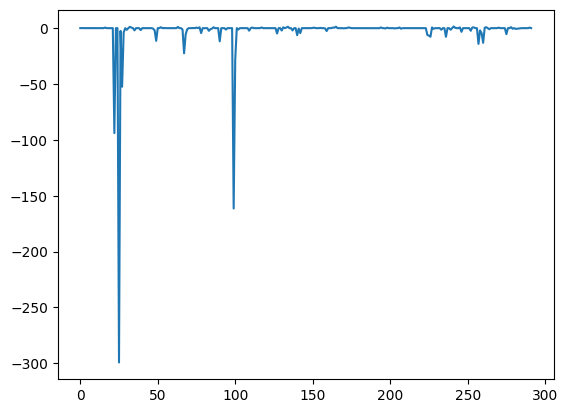

In [ ]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])

In [ ]:
merged_data["indice_deterioro"] = [i if i > 0 else 0 for i in merged_data["indice_deterioro"] ]

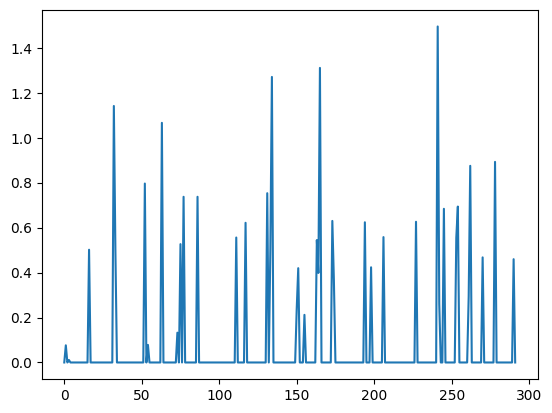

In [ ]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data["indice_deterioro"] = scaler.fit_transform([[i] for i in merged_data["indice_deterioro"]])

In [ ]:
print(max(merged_data["indice_deterioro"]))
print(max(merged_data["autoencoder_index"]))
print(max(merged_data["forecast_index"]))

1.0
1.0
1.0


In [ ]:
merged_data.at[241, "autoencoder_index"] = 1
merged_data.at[131, "autoencoder_index"] = 0.8

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_data["autoencoder_index"] = scaler.fit_transform([[i] for i in merged_data["autoencoder_index"]])

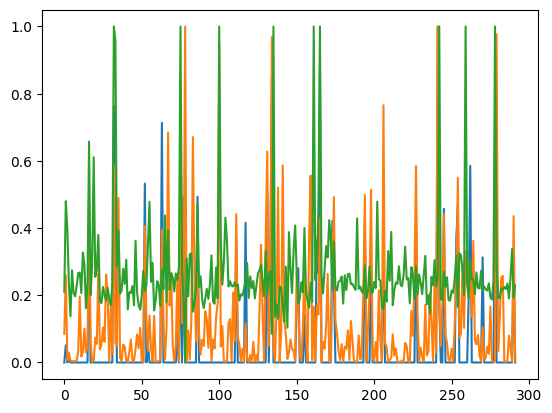

In [ ]:
import matplotlib.pyplot as plt

plt.plot(merged_data["indice_deterioro"])
plt.plot(merged_data["autoencoder_index"])
plt.plot(merged_data["forecast_index"])

print(merged_data[["indice_deterioro", "forecast_index", "autoencoder_index"]].head(100))

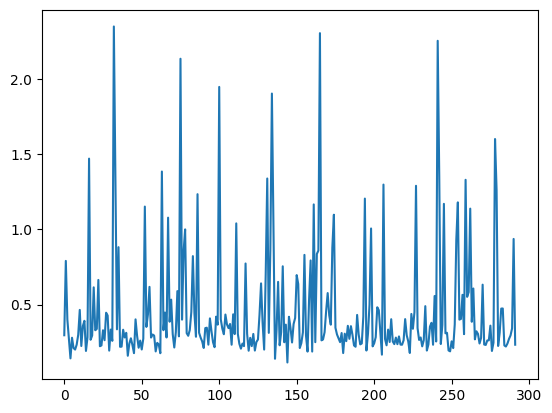

In [ ]:
plt.plot(merged_data["forecast_index"] + merged_data["indice_deterioro"] + merged_data["autoencoder_index"])

In [ ]:
merged_data["sum_indexs"]= merged_data["forecast_index"] + merged_data["indice_deterioro"] + merged_data["autoencoder_index"]

In [ ]:
merged_data[merged_data["sum_indexs"] == min(merged_data["sum_indexs"])]

,material,unitats_2022_x,vendes_2022_x,preu_venda_unitari_2022_x,unitats_2023_x,vendes_2023_x,preu_venda_unitari_2023_x,variacio_preu_venda_unitari_2022_2023_x,proporcio_variacio_preu_venda_unitari_2022_2023_x,data_darrera_entrada,...,stock_final_2023_y,valor_total_stock_2023_y,cost_unitari_stock_2023_y,delta_unitats,delta_preu_venda_unitari,rotacion_inventario,inactividad,indice_deterioro,deterioro,sum_indexs
144,152430159,25200000,164378.0,0.006523,8720000,53597.2,0.006146,-0.000376,-0.057715,1970-01-01 01:00:45.328,...,1780000.0,7137.8,0.00401,-0.653968,-0.022785,4.898874,-90.0,0.0,False,0.11454


In [ ]:
merged_data.iloc[144]["preu_venda_unitari_2023_x"]

0.006146467889908257

In [ ]:
merged_data["fair_price"] = merged_data["preu_venda_unitari_2023_x"] - merged_data["preu_venda_unitari_2023_x"] * \
    ((merged_data["sum_indexs"]-0.25)/1.5)

In [ ]:
merged_data.head(15)

,material,unitats_2022_x,vendes_2022_x,preu_venda_unitari_2022_x,unitats_2023_x,vendes_2023_x,preu_venda_unitari_2023_x,variacio_preu_venda_unitari_2022_2023_x,proporcio_variacio_preu_venda_unitari_2022_2023_x,data_darrera_entrada,...,valor_total_stock_2023_y,cost_unitari_stock_2023_y,delta_unitats,delta_preu_venda_unitari,rotacion_inventario,inactividad,indice_deterioro,deterioro,sum_indexs,fair_price
0,114230822,1018500,54892.49,0.053895,885500,58951.87,0.066575,0.012679,0.235256,1970-01-01 01:00:45.351,...,2292.96,0.034481,-0.130584,0.198437,13.315589,-105.0,0.000000,False,0.295681,0.064547
1,115030252,75900,6825.62,0.089929,27600,2127.68,0.077090,-0.012839,-0.142771,1970-01-01 01:00:45.315,...,1777.15,0.077267,-0.636355,-0.128484,1.199948,2.0,0.051069,True,0.790270,0.049324
2,115070602,884000,100307.84,0.113470,340000,34522.45,0.101537,-0.011934,-0.105171,1970-01-01 01:00:45.328,...,5732.32,0.057323,-0.615384,-0.096653,3.399966,-87.0,0.000000,False,0.400257,0.091366
3,115130209,23217,5179.48,0.223090,15600,3770.68,0.241710,0.018620,0.083465,1970-01-01 01:00:45.281,...,2298.10,0.239385,-0.328064,0.079885,1.624831,7.0,0.007279,True,0.267514,0.238888
4,115170581,357000,26188.50,0.073357,1023000,74195.50,0.072527,-0.000830,-0.011311,1970-01-01 01:00:45.331,...,2140.13,0.050955,1.865541,-0.009954,24.356563,-93.0,0.000000,False,0.141911,0.077754
5,116211401,180000,20998.44,0.116658,1533600,156152.48,0.101821,-0.014837,-0.127185,1970-01-01 01:00:45.351,...,3143.70,0.087325,7.519958,-0.117143,42.598817,-121.0,0.000000,False,0.279121,0.099844
6,116490259,152600,24814.65,0.162612,152600,26612.66,0.174395,0.011783,0.072458,1970-01-01 01:00:45.343,...,1386.79,0.090051,0.000000,0.068260,9.908448,-109.0,0.000000,False,0.210180,0.179024
7,118030902,711900,100467.24,0.141125,741400,109717.26,0.147987,0.006861,0.048617,1970-01-01 01:00:45.322,...,6892.27,0.123076,0.041438,0.045400,13.239049,-71.0,0.000000,False,0.200380,0.152882
8,118030904,376560,56967.80,0.151285,308000,51353.82,0.166733,0.015448,0.102115,1970-01-01 01:00:45.343,...,1809.22,0.123076,-0.182069,0.095783,20.950956,-106.0,0.000000,False,0.232795,0.168646
9,118130103,204000,31535.34,0.154585,85000,13904.98,0.163588,0.009003,0.058240,1970-01-01 01:00:45.315,...,2167.40,0.127494,-0.583330,0.054701,4.999706,-74.0,0.000000,False,0.298744,0.158272


In [ ]:
merged_data["new_value"] = merged_data[["fair_price", "cost_unitari_stock_2023_y"]].min(axis=1)

In [ ]:
merged_data.columns

Index(['material', 'unitats_2022_x', 'vendes_2022_x',
       'preu_venda_unitari_2022_x', 'unitats_2023_x', 'vendes_2023_x',
       'preu_venda_unitari_2023_x', 'variacio_preu_venda_unitari_2022_2023_x',
       'proporcio_variacio_preu_venda_unitari_2022_2023_x',
       'data_darrera_entrada', 'dies_ultima_entrada_x', 'data_darrera_sortida',
       'dies_ultima_sortida_x', 'diferencia_entrada_sortida_x',
       'stock_final_2023_x', 'valor_total_stock_2023_x',
       'cost_unitari_stock_2023_x', 'forecast_index', 'cost_valor',
       'proporcio_vendes_stock', 'autoencoder_index', 'unitats_2022_y',
       'vendes_2022_y', 'preu_venda_unitari_2022_y', 'unitats_2023_y',
       'vendes_2023_y', 'preu_venda_unitari_2023_y',
       'variacio_preu_venda_unitari_2022_2023_y',
       'proporcio_variacio_preu_venda_unitari_2022_2023_y',
       'dies_ultima_entrada_y', 'dies_ultima_sortida_y',
       'diferencia_entrada_sortida_y', 'stock_final_2023_y',
       'valor_total_stock_2023_y', 'cost_un

In [ ]:
merged_data["dies_ultima_entrada_x"].head()

0   -60
1   -24
2   -37
3    10
4   -40
Name: dies_ultima_entrada_x, dtype: int64

In [ ]:
useful_data = merged_data[["material", "unitats_2022_x", "vendes_2022_x", 'preu_venda_unitari_2022_x', 'unitats_2023_x', 'vendes_2023_x',
       'preu_venda_unitari_2023_x', 'stock_final_2023_x', 'valor_total_stock_2023_x',
       'cost_unitari_stock_2023_x', 'dies_ultima_sortida_x', 'dies_ultima_entrada_x', 'forecast_index', 'autoencoder_index', 'indice_deterioro', 'sum_indexs', 'fair_price', 'new_value']]

In [ ]:
useful_data.columns = useful_data.columns.str.rstrip('_x')

In [ ]:
useful_data.to_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_new_value.xlsx", index=False)